# ResNet 34 using TF and Keras

### 1. Import required packages

In [5]:
from __future__ import print_function
%matplotlib inline
import os
import time 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.activations import relu
from tensorflow.keras.regularizers import l2
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import cifar100, cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

print("Packages Loaded")
print('The Tensorflow version is {}.'.format(tf.__version__))
print('The Keras version is {}.'.format(keras.__version__))
print('The Pandas version is {}.'.format(pd.__version__))
print('The Numpy version is {}.'.format(np.__version__))
print(np.__file__)

Packages Loaded
The Tensorflow version is 2.1.0.
The Keras version is 2.2.4-tf.
The Pandas version is 1.0.3.
The Numpy version is 1.18.1.
C:\ProgramData\Anaconda2\envs\TFK35\lib\site-packages\numpy\__init__.py


## ResNet for Cifrar 100 Dataset

### 1. Load the Cifar 100 dataset

In [6]:
#Download the cifar data from keras
cifar100 = tf.keras.datasets.cifar100

#Split the data between train and test data
(x_train, y_train),(x_test, y_test) = cifar100.load_data()

#Resize the images for ResNet
xc1_train = tf.image.resize(x_train, [224, 224])

#Normalize the data 
#xc1_train = xc1_train.astype('float32')
#xc1_test = xc1_test.astype('float32')
xc1_train /= 255

#xc1_train = tf.keras.utils.normalize(xc1_train, axis=1)

#Zero pad is not needed as cifar data is 32 * 32
#xf1_train = tf.pad(xf1_train, [[0, 0], [2,2], [2,2]])

# Convert class vectors to binary class matrices.
yc1_train = tf.keras.utils.to_categorical(y_train, 100)

#Display a sample image
fig = plt.figure()
_ = ax1 = plt.subplot(1,2,1)
_ = ax1.set_title(y_train[14])
_ = plt.imshow(xc1_train[14])

ax2 = plt.subplot(1,2,2)
_ = ax2.set_title(y_train[14])
_ = plt.imshow(xc1_train[14], cmap = plt.cm.binary)
_ = plt.show()

# new axis is not needed as cifar dataset is of color images having 3 channesl. 
#xc_train = xc_train[:, :, :, np.newaxis]
#xc_test = xc_test[:, :, :, np.newaxis]

#Print the shape of train and test data
print('Shape of Cifar fashion train data {}.'.format(xc1_train.shape))

C:\ProgramData\Anaconda2\envs\TFK35\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Shape of Cifar fashion train data (50000, 224, 224, 3).


In [7]:
#Repeat the above steps for test set
xc1_test = tf.image.resize(x_test, [224, 224])
xc1_test /= 255
#xc1_test = tf.keras.utils.normalize(xc1_test, axis=1)
#xf1_test = tf.pad(xf1_test, [[0, 0], [2,2], [2,2]])
yc1_test = tf.keras.utils.to_categorical(y_test, 100)
print('Shape of Cifar fashion test data {}.'.format(xc1_test.shape))

Shape of Cifar fashion test data (10000, 224, 224, 3).


### 2. Train the ResNet

In [8]:
class ResidualUnit(keras.layers.Layer):
    def __init__(self,filters,strides=1,activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers =[
            keras.layers.Conv2D(filters,3, strides=strides, padding="same", use_bias=False),
            keras.layers.BatchNormalization(),
            self.activation,
            keras.layers.Conv2D(filters, 3, strides=1, padding="same", use_bias=False),
            keras.layers.BatchNormalization()
        ]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                keras.layers.Conv2D(filters, 1, strides=strides, padding="same", use_bias=False),
                keras.layers.BatchNormalization()
            ]
            
    def call(self,inputs):
        Z=inputs
        for layer in self.main_layers:
            Z=layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 5537s 138ms/sample - loss: 4.0519 - accuracy: 0.0788 - val_loss: 3.8896 - val_accuracy: 0.1180
Epoch 2/10
40000/40000 [==============================] - 5253s 131ms/sample - loss: 3.3649 - accuracy: 0.1830 - val_loss: 3.3704 - val_accuracy: 0.2066
Epoch 3/10
40000/40000 [==============================] - 5236s 131ms/sample - loss: 2.7711 - accuracy: 0.2918 - val_loss: 3.0175 - val_accuracy: 0.3085
Epoch 4/10
40000/40000 [==============================] - 5258s 131ms/sample - loss: 2.2802 - accuracy: 0.3936 - val_loss: 2.7219 - val_accuracy: 0.3672
Epoch 5/10
40000/40000 [==============================] - 5253s 131ms/sample - loss: 1.8878 - accuracy: 0.4801 - val_loss: 2.0556 - val_accuracy: 0.4616
Epoch 6/10
40000/40000 [==============================] - 5551s 139ms/sample - loss: 1.5726 - accuracy: 0.5559 - val_loss: 2.1783 - val_accuracy: 0.4835
Epoch 7/10
40000/40000 [========

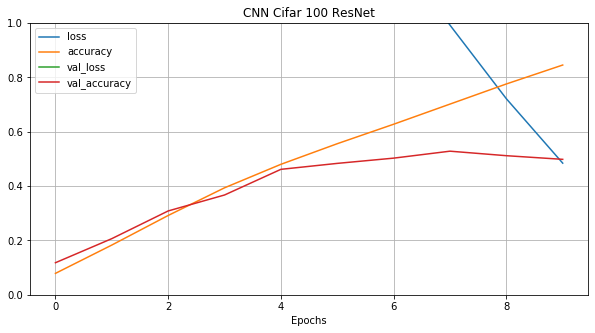

10000/10000 [==============================] - 235s 24ms/sample - loss: 2.7531 - accuracy: 0.4956
Validation Accuracy: 0.4956
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 112, 112, 64)      9408      
_________________________________________________________________
batch_normalization (BatchNo (None, 112, 112, 64)      256       
_________________________________________________________________
activation (Activation)      (None, 112, 112, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 56, 56, 64)        0         
_________________________________________________________________
residual_unit (ResidualUnit) (None, 56, 56, 64)        74240     
_________________________________________________________________
residual_unit_1 (ResidualUni (None, 56, 56, 64)        74240  

In [9]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64, [7, 7], strides=(2, 2), input_shape=xc1_train.shape[1:], 
                                 padding="same", use_bias=False))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding="same"))

##Add residucal units
prev_filters = 64
for filters in [64] * 3 + [128] * 4 +[256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters

model.add(keras.layers.GlobalAvgPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation=tf.nn.softmax))

run_id = time.strftime("%Y%m%d-%H%M%S")
log_dir = os.path.join('logs','fit',run_id,'')
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_detail = model.fit(xc1_train, yc1_train,
                  batch_size=32,
                  epochs=10,
                  callbacks=[early_stopping_cb, tensorboard_callback],
                  shuffle=True,
                  validation_split=0.2)

#plot accuracies for each epoch
history = pd.DataFrame(model_detail.history)
 
_ = history.plot(figsize=(10,5))
_ = plt.grid(True)
_ = plt.gca().set_ylim(0,1)
_ = plt.xlabel('Epochs')
_ = plt.title('CNN Cifar 100 ResNet')
_ = plt.show()

#After training the model, evaluate the test set
val_loss, val_acc = model.evaluate(xc1_test,yc1_test)
print("Validation Accuracy: "+str(val_acc))

#Print the summary of the model
model.summary()

### 3. Plot the predictions

In [10]:
wd = os. getcwd()
label_dir = os.path.join(wd,'data','Labels.csv')
print(label_dir)
cols = ["cifar100"]
label_df = pd.read_csv(label_dir)
class_names = label_df['cifarh'].tolist()

C:\Users\pmspr\Documents\Machine Learning\Computer vision\Git Repo\Convolutions\data\Labels.csv


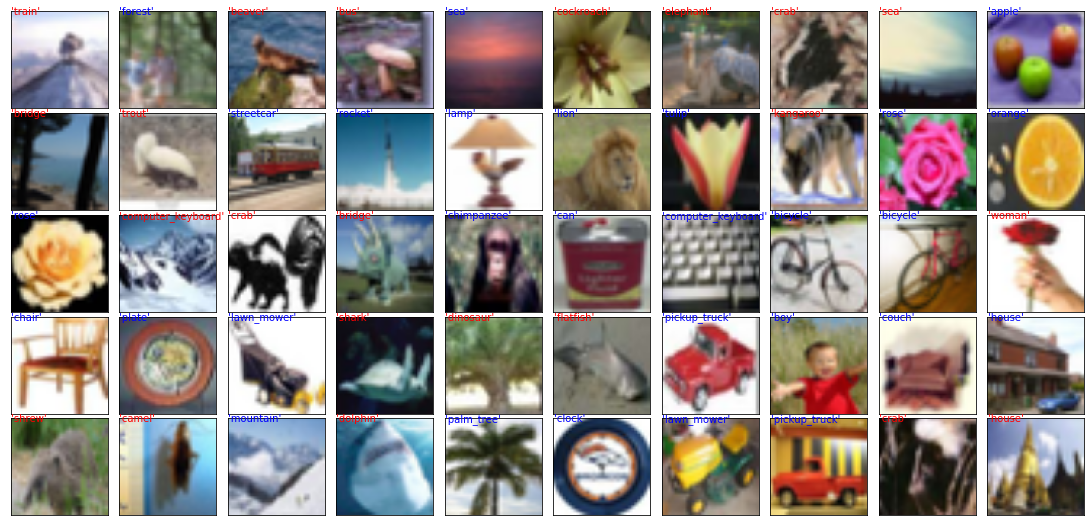

In [11]:
predictionc_values = model.predict_classes(xc1_test)

# set up the figure
fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the images: each image is 224x234 pixels
for i in range(50):
    ax = fig.add_subplot(5, 10, i + 1, xticks=[], yticks=[])
    _ = ax.imshow(tf.reshape(xc1_test[i,:], [224, 224,3]),cmap=plt.cm.gray_r, interpolation='nearest')

    if predictionc_values[i] == np.argmax(yc1_test[i]):
        # label the image with the blue text
        _ = ax.text(0, 7, class_names[predictionc_values[i]], color='blue')
    else:
        # label the image with the red text
        _ = ax.text(0, 7, class_names[predictionc_values[i]], color='red')

### 4. Calculate the correct count of predictions

In [94]:
#Create the dataframe with actual and predicted classes
target = pd.DataFrame(columns=['actual','predict'])
ytest = []
for i in range(yc1_test.shape[0]):
    ytest.append(np.argmax(yc1_test[i]))
target['actual'] = ytest
target['predict'] = predictionc_values
#print(target.head(5))

In [95]:
#Create the dataframe with class and count of correct prediction per class
acc = pd.DataFrame(columns=['class','names','accuracy'])
clas = []
accuracy = []
for i in range(100):
    clas.append(i)
    count = 0
    for j in range(10000):
        if ((target.iloc[j,0] == i) & (target.iloc[j,1] == i)):
            count = count + 1
    accuracy.append(count)
acc['class'] = clas
acc['names'] = class_names
acc['accuracy'] = accuracy

In [96]:
#sort the dataframe by count
data = acc.sort_values(by='accuracy',ascending=False)
_ = data.set_index(np.arange(len(data.index)))

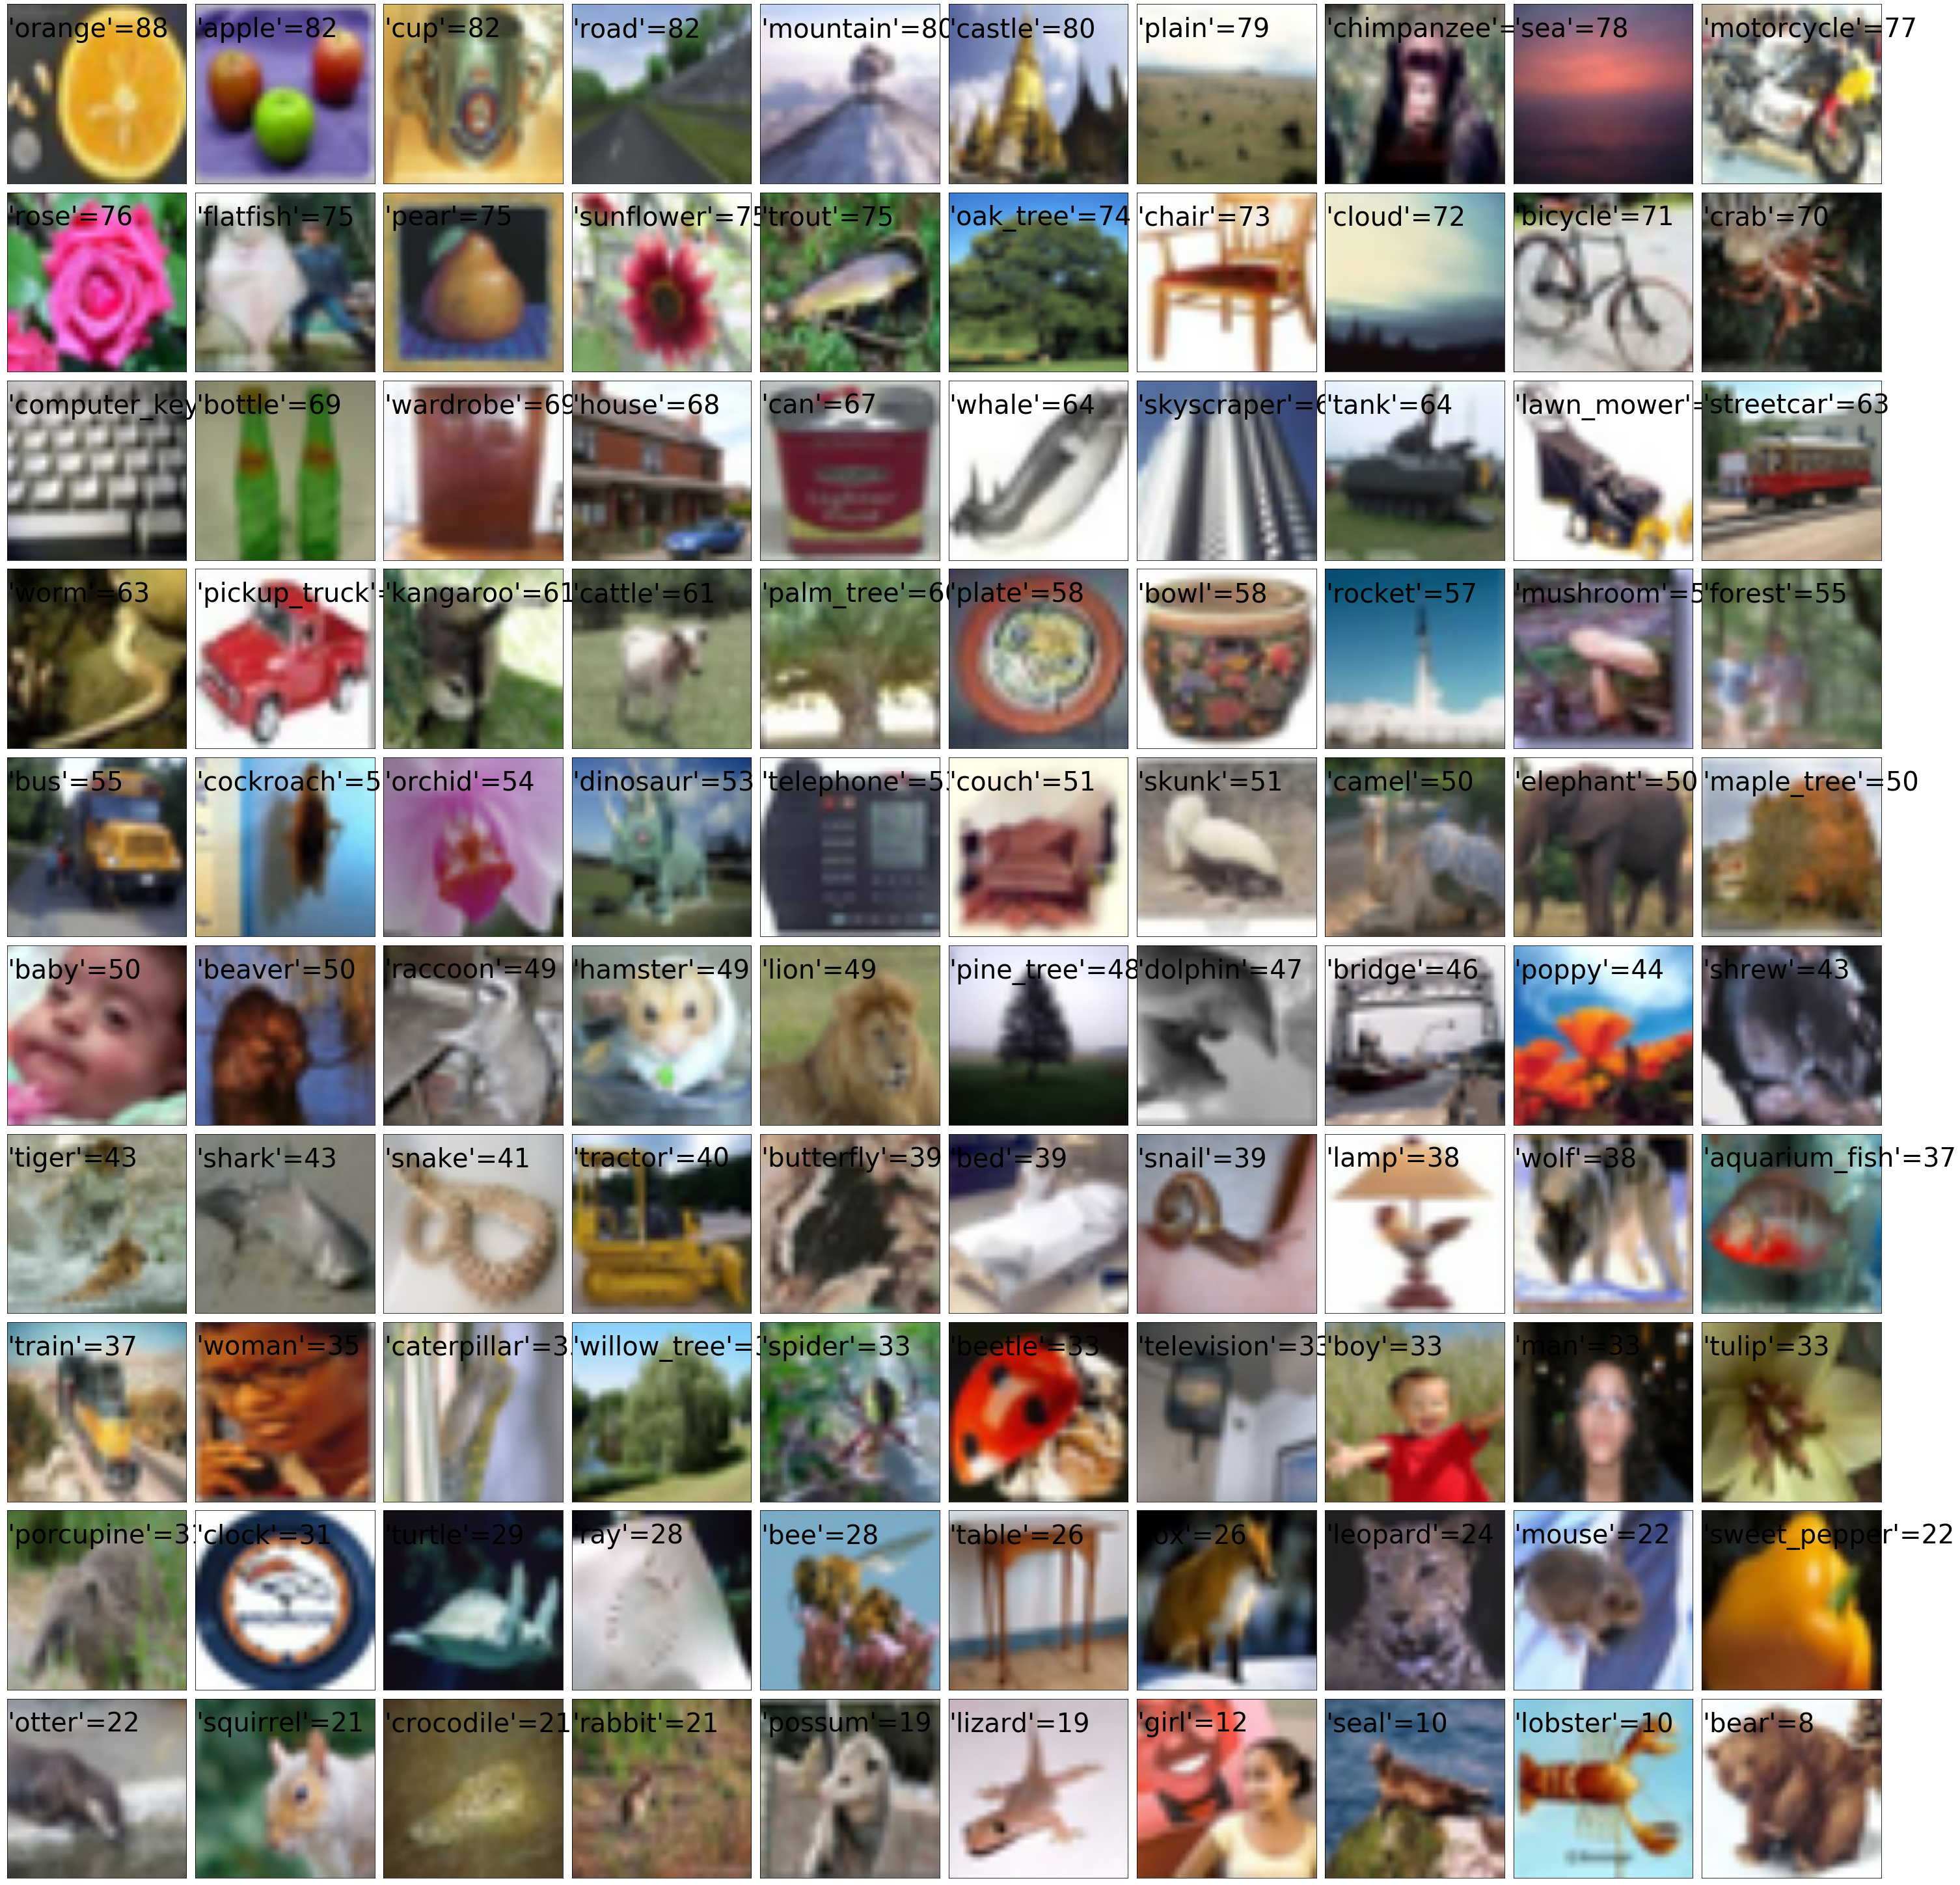

In [92]:
# set up the figure
fg = plt.figure(figsize=(40, 40))
fg.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the images for each class with name and count as header
for i in range(100):
    ind = target[target['actual'] == data.iloc[i,0]].index.tolist()
    txt = data.iloc[i,1] + '=' + str(data.iloc[i,2])
    idx = ind[0]
    ax = fg.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    _ = ax.imshow(tf.reshape(xc1_test[idx,:], [224, 224,3]),cmap=plt.cm.gray_r, interpolation='nearest')
    _ = ax.text(0, 40, txt, color='black',fontsize=40)

In [97]:
#Tensorflow board
%load_ext tensorboard
%tensorboard --logdir logs/fit --host localhost --port 8088

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 12468.